# Inversion and Optimisation  <a class="tocSkip"></a>

## Lecture 2b: Quadratic Optimisation and Linear Inversion<a class="tocSkip"></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div ><ul ><li><span><a  href="#Optimisation-vs.-Root-Finding"><span >1  </span>Optimisation vs. Root Finding</a></span><ul ><li><span><a  href="#Optimisation"><span >1.1  </span>Optimisation</a></span></li><li><span><a  href="#Root-finding"><span >1.2  </span>Root finding</a></span><ul ><li><span><a  href="#Example:-linear--and-non-linear-systems-of-equations"><span >1.2.1  </span>Example: linear  and non-linear systems of equations</a></span></li></ul></li><li><span><a  href="#Local-Minima-and-Maxima-(extrema)"><span >1.3  </span>Local Minima and Maxima (extrema)</a></span></li><li><span><a  href="#Determining-local-extrema-in-multiple-dimensions"><span >1.4  </span>Determining local extrema in multiple dimensions</a></span></li><li><span><a  href="#Symmetric-Positive-Definite-(SPD)-Matrices"><span >1.5  </span>Symmetric Positive Definite (SPD) Matrices</a></span></li><li><span><a  href="#Necessary-and-sufficient-conditions-for-local-minima"><span >1.6  </span>Necessary and sufficient conditions for local minima</a></span></li><li><span><a  href="#Quadratic-Minimisation-and-Linear-Inversion"><span >1.7  </span>Quadratic Minimisation and Linear Inversion</a></span></li></ul></li><li><span><a  href="#Steepest-Descent-for-Quadratic-Optimisation"><span >2  </span>Steepest Descent for Quadratic Optimisation</a></span></li>
    <li><span><a href="#Improving-the-Steepest-or-Gradient-Descent-Method"><span>3  </span>Improving the Steepest or Gradient Descent Method</a></span>
       <ul><li><span><a href="#Stochastic-and-Mini-Batch-approaches"><span>3.1  </span>Stochastic and Mini Batch approaches</a></span></li>
           <li><span><a href="#Learning-Rate-Schemes"><span>3.2  </span>Learning Rate Schemes</a></span></li>
           <li><span><a href="#Momentum-Methods"><span>3.3  </span>Momentum Methods</a></span></li></ul></li>
    <li><span><a  href="#List-of-Definitions"><span >4  </span>List of Definitions</a></span></li></ul></div>

## Summary <a class="tocSkip"></a>
In this lecture we look closer at the relationship between optimisation problems and root-finding problems, in particular in multiple dimensions. We introduce our first iterative method to solve these problem: Gradient (or Steepest) Descent. For well defined problems, like quadratic minimisation - which as we'll see in this lecture is equivalent to solving a linear equation - the steepest descent method is not a very efficient method in general, but the idea behind it and its convergence behaviour are important in the analysis of all iterative methods. Tomorrow we will continue with the CG method, which after some further improvements introduced in lecture 4, is in fact the most powerful method for linear problems based on Symmetric Positive Definite matrices. 
    
### Important concepts: <a class="tocSkip"></a>
- conditions for local minima
- the relation between optimisation and root-finding problems (a form of inversion), in particular the optimisation of a quadratic function and linear inversion
- the role of the residual vector, how it relates to the gradient in an optimisation problem, and the relation between error (the mismatch between an approximation and the exact answer) and the residual
- the Steepest Descent method: always heading in the direction of the negative gradient

In [1]:
# needs to be in separate cell!
%matplotlib inline

In [2]:
# these two lines ensure that imported modules are automatically reloaded when changed
%load_ext autoreload
%autoreload 2
from lecture2 import *  # you need lecture2.py in the same folder

In [3]:
%%html
<style>
a.definition {
    color: blue;
    font-style: italic;
    font-weight: bold;
}
</style>

# Optimisation vs. Root Finding

## Optimisation

In this course, we consider the general <a class="definition" href="#definitions" id="optimisationproblem">optimisation problem</a>:

$$
\text{find } \;\;\; {\bf x}^* \in {\mathbb{R}}^n \;\;\; \text{ such
that } \;\;\; f({\bf x}^*) = \min_{{\bf x} \in
{\mathbb{R}}^n} \, f({\bf x}),
$$

where $f$ is a continuous function from ${\mathbb{R}}^n$ to ${\mathbb{R}}$.

This of course assumes that $f$ actually attains a minimum at any point ${\bf x}^*$, which is not the case if $f$ is not bounded from below (see left figure below) or if it attains its minimum (strictly speaking its infimum) in the limit of $\|{\bf x}\|\to\infty$ (middle figure). Furthermore ${\bf x}^*$ is not necessarily unique (figure to the right).

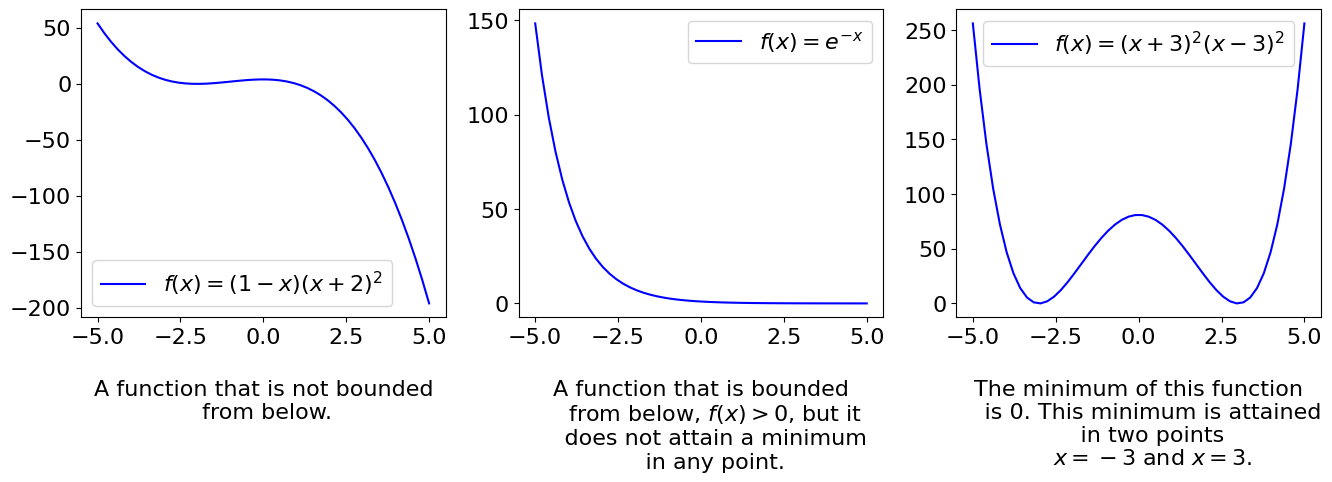

In [4]:
figure1()

If $f$
is differentiable in the location of
the minimum ${\bf x}^*$, then we know that

$$
f'({\bf x}^*) = \left.\frac{\partial f({\bf x})}{\partial {\bf x}}\right|_{{\bf x}={\bf x}^\ast}
=
\begin{pmatrix}
\left.\frac{\partial f({\bf x})}{\partial x_1}\right|_{{\bf x}={\bf x}^*} \\
\left.\frac{\partial f({\bf x})}{\partial x_2}\right|_{{\bf x}={\bf x}^*} \\
  \vdots \\
\left.\frac{\partial f({\bf x})}{\partial x_n}\right|_{{\bf x}={\bf x}^*} \\
\end{pmatrix}
= {\bf 0},
$$

in other words all of the partial derivatives of $f$
at
${\bf x}^*$ are zero.

If we define ${\bf F}({\bf x})=f'({\bf x})$, then ${\bf F}: {\mathbb{R}}^n \to {\mathbb{R}}^n$, and we have that ${\bf F}({\bf x}^*) = 0$.

## Root finding
Inversion problems of the form (for any ${\bf F}:{\mathbb{R}}^n\to {\mathbb{R}}^n$):

$$
\text{find } \;\;\; {\bf x}^* \in {\mathbb{R}}^n \;\;\; \text{
such that } \;\;\; {\bf F}({\bf x}^*) = {\bf 0}
$$

are called <a class="definition" href="#definitions" id="rootfindingproblem">root-finding problem</a>s, and the points 
in which ${\bf F}({\bf x}^*)={\bf 0}$ are called <a class="definition" href="#definitions" id="roots">roots</a>.

As we will see in the next section not *every* solution of ${\bf F}({\bf x}^*)={\bf 0}$, where
${\bf F}({\bf x})={\bf f}'({\bf x})$ is also a solution of the optimisation problem.

### Example: linear  and non-linear systems of equations

For a linear system of $n$ equations and $n$ unknowns, we know that we can write it in the following form:

$$
\underline{\mathbf A} {\bf x} = {\bf b}
$$

where $\underline{\mathbf A}$ is a $n\times n$ matrix, the right-handside ${\bf b}$ is a $n$-vector, and the solution is stored in a $n$-vector ${\bf x}$.

Using the notation above we write:

$$
\text{solve }{\bf F}({\bf x}^*) = 0 \text{ for } {\bf x}^*
\text{ where }
{\bf F}({\bf x})=\underline{\mathbf A}{\bf x}-{\bf b}
$$

Similarly we can write any system of $n$ *non-linear* equations in the form ${\bf F}({\bf x})={\bf 0}$ by simply moving all right-hand side terms to the left.

## Local Minima and Maxima (extrema)
In one dimension, i.e. $f:{\mathbb{R}}\to{\mathbb{R}}$ and $F(x)=f'(x): {\mathbb{R}}\to{\mathbb{R}}$, a method
to find local minima and maxima of the function $f$ is to search for roots of
$f'$, i.e. points for which $f'(x)=0$. These points are also called <a class="definition" href="#definitions" id="stationarypoints">stationary
points</a> of the function $f$. 

Consider the following two examples:

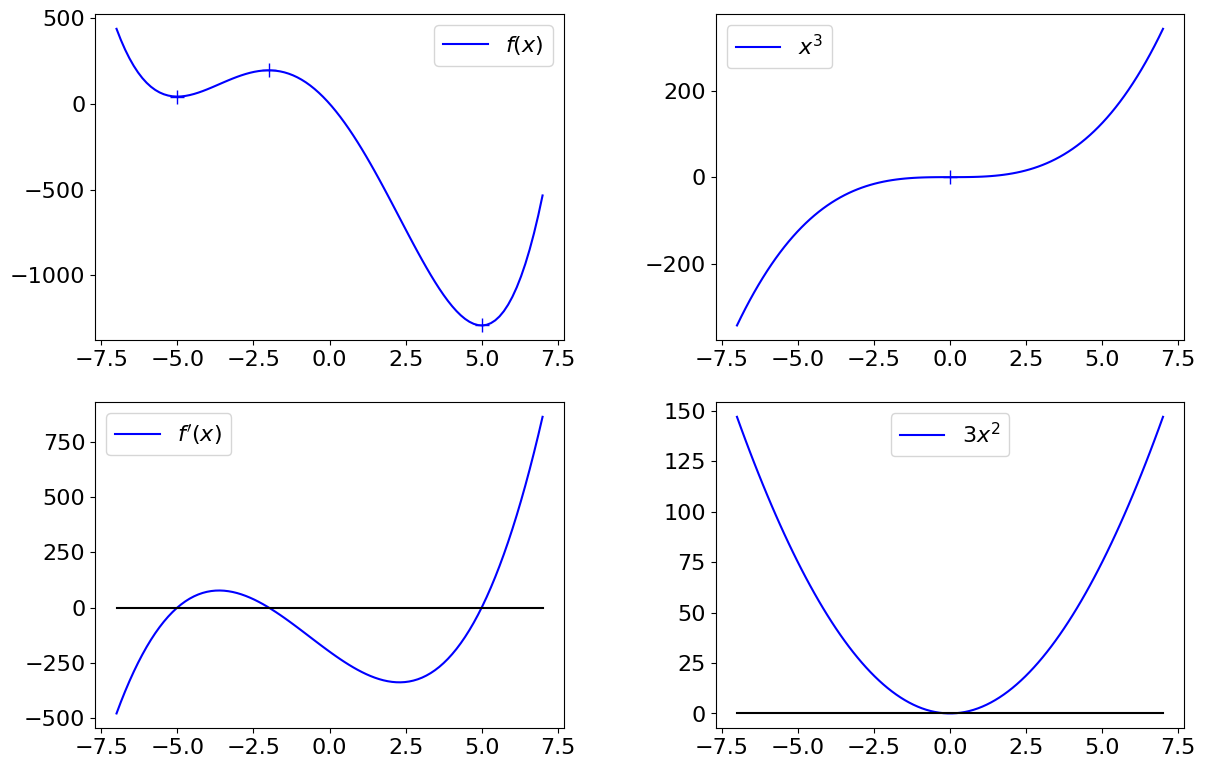

In [5]:
figure2()

The function may have multiple <a class="definition" href="#definitions" id="localminimaormaxima">local minima or maxima</a>, as in the
example on the left, above. In all of these <a class="definition" href="#definitions" id="localextrema">local extrema</a> we have $f'(x)=0$
but for only one point do we have $f(x^*)=\mathrm{min}_{x\in\mathbb{R}}f(x)$, the *global* minimum.
So $f'(x)=0$ does not necessarily mean we have found the <a class="definition" href="#definitions" id="globalminimumormaximum">global minimum (or maximum)</a> of the
function. 

It does not even guarantee that we have found a *local* minimum (or
maximum), as we can see in the example on the right.
In one dimension, a
stationary point of $f$ ($f'(x)=0$), only indicates a local extremum if the
derivative $f'$ changes sign. If $f$, in addition to having zero derivative in
$x$, is twice differentiable in $x$, we can use the second derivative $f''(x)$
to distinguish local minima from local maxima. A positive second derivative,
$f''(x)\gt 0$, guarantees a local minimum. A negative second derivative, $f''(x)\lt 0$
identifies a local maximum. If the second derivative is also zero, $f''(x)=0$, we can
unfortunately draw no further conclusion.

It should be stressed that having a
positive second derivative (in addition to zero first derivative) identifies a
local minimum, but not all local minima have a zero first derivative and
a positive second derivative. So a positive second derivative is a sufficient, but not a
necessary condition for a local minimum as we can see in the following example.

(*Some mathematical terminlogy: "A is a sufficient condition for B" means that A implies B (if A is true then B is true), whereas "A is a necessary condition for B" means that B implies A (if B is true then necessarily A must be true).*)

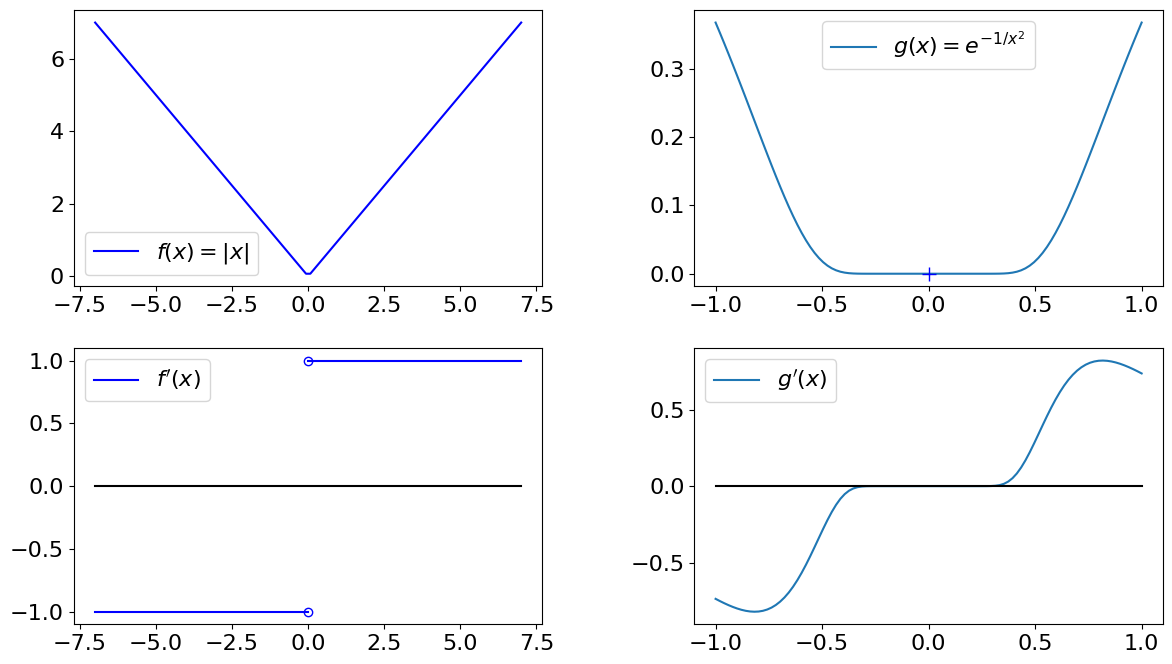

In [6]:
figure3()

In the example above, on the left $f(x)=|x|$ has a minimum at $x=0$ but its
derivative at $x=0$ does not exist. On the right, $g(x)=\exp(-1/x^2)$ again has
a minimum at $x=0$, its first derivative is indeed zero at $x=0$, but so is its
second derivative, and in fact all its higher order derivatives are zero there.

## Determining local extrema in multiple dimensions
In
more than one dimension, things get a little more complicated, as we can
approach a local extremum from different directions. A well know example of this
in 2 dimensions is formed by a so called <a class="definition" href="#definitions" id="saddlepoint">saddle point</a>:

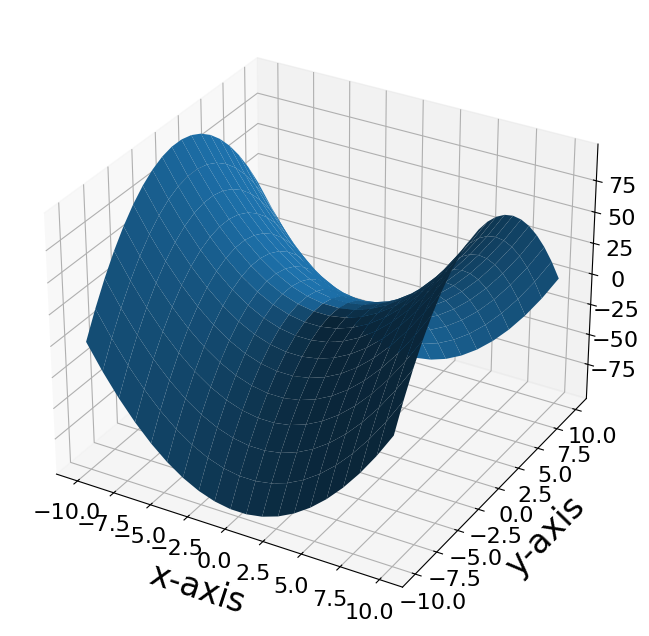

In [7]:
figure4()

In the figure above, $f:{\mathbb{R}}^2 \to {\mathbb{R}}$ is given by

$$
f({\bf x}) = \tfrac 12{\bf x}^T \underline{\mathbf{A}} {\bf x}, \;\;\; \text{ with } \;\;\;
\underline{\mathbf{A}} =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

(note that post and pre multiplying a matrix with a vector and its transpose in this manner returns a scalar - test this yourself on a $2\times 2$ example).

Its derivative is:

$$
f'({\bf x}) = \underline{\mathbf{A}} {\bf x}
$$

The matrix $\underline{\mathbf{A}}$ is invertible, so $\underline{\mathbf{A}}{\bf x}={\bf 0}$
implies that ${\bf x}={\bf 0}$. Therefore
the only stationary point of $f$, where $f'({\bf x})={\bf 0}$, is at the
origin. However it is clear that this point provides neither a
global, nor a
local minimum or maximum.

This can be further illustrated by
looking at the
behaviour of $f$ when heading in different directions from the
stationary point
(in this example located at the origin). Let's take an arbitrary
direction
vector ${\bf v}$. Then the values of $f$ along the line through the
origin, given
by $t\mapsto t{\bf v}$, form a one-dimensional function

$$
f_{{\bf v}}(t) =
\tfrac 12\left(t {\bf v}\right)^T \underline{\mathbf{A}} \left(t {\bf v}\right) = \tfrac
12{\bf v}^T\underline{\mathbf{A}}{\bf v} ~t^2
$$

As expected, the first derivative of $f_{{\bf v}}:{\mathbb{R}}\to{\mathbb{R}}$ at $t=0$ (which corresponds to the origin in the ${\mathbb{R}}^2$-plane), is
zero:

$$
f_{{\bf v}}'(t) = {\bf v}^T\underline{\mathbf{A}}{\bf v} ~t \implies f_{{\bf v}}'(0) = 0
$$

The second derivative however is given by:

$$
f_{{\bf v}}''(t) = {\bf v}^T\underline{\mathbf{A}}{\bf v}
$$

which can be positive or negative depending on our choice of the direction
${\bf v}$. In fact:

\begin{align*}
{\bf v} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \implies
f_{{\bf v}}''(t) = 1, \\
{\bf v} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} \implies
f_{{\bf v}}''(t) = -1.
\end{align*}

In other words, if we head along the x-axis, spanned
by the vector $(1,0)$, the second derivative is positive and thus the values of
$f$ reach a minimum at the origin, whereas if we head along the y-axis $f$
reaches a maximum at the origin.

## Symmetric Positive Definite (SPD) Matrices
We can generalize this analysis to
multiple dimensions for any twice
differentiable function $f: {\mathbb{R}}^n \to {\mathbb{R}}$. Its
derivative $f'$ is a function from
${\mathbb{R}}^n \to {\mathbb{R}}^n$. Its second derivative, often
referred to as the <a class="definition" href="#definitions" id="Hessian">Hessian</a>, is a
function $f'':{\mathbb{R}}^n \to {\mathbb{R}}^n\times{\mathbb{R}}^n$,
meaning that at any point ${\bf x}\in{\mathbb{R}}^n$ the second derivative is a $n\times n$
matrix $f''({\bf x})$, whose
entries are given by:

$$
\newcommand\jacf[2]{\frac{\partial^2 f({\bf x})}{\partial x_{#1}\partial x_{#2}}}
f''(x) = 
\begin{pmatrix}
\jacf 11 & \jacf
12 & \cdots & \jacf 1n \\
\jacf 21 &
\jacf 22 & \cdots & \jacf 2n \\
\vdots &
\vdots & \ddots & \vdots \\
\jacf n1 &
\jacf n2 & \ldots & \jacf nn
\end{pmatrix}
\label{foo}
$$

Again, a stationary
point of $f$ is defined as any
point ${\bf x}$ in which $f'({\bf x})$ is zero (that is
the zero vector in ${\mathbb{R}}^n$).

A stationary point ${\bf x}$ of $f$ is guaranteed to be a local minimum if 

$$
{\bf v}^T f''({\bf x})
{\bf v} \gt 0 \;\;\; \text{ for all } \;\;\; {\bf v}\in{\mathbb{R}}^n,
\;\;\; \text{except } \;\;\;{\bf v}=0
$$

Note that
from the above expansion of $f''({\bf x})$
it is clear that the Hessian matrix
$f''({\bf x})$ is always symmetric. A matrix
$\underline{\mathbf{A}}$ that is symmetric and
satisfies ${\bf v}^T\underline{\mathbf{A}}{\bf v} \gt 0$ for all
${\bf v}$, is called <a class="definition" href="#definitions" id="SymmetricPositiveDefiniteSPD">Symmetric
Positive Definite (SPD)</a>. As we were reminded in yesterday's lecture,
the $n$
eigenvalues of a real symmetric $n\times n$-matrix are real-valued
and the matrix has basis of $n$ orthogonal
eigenvectors. From this it can be derived (try it!) that an
equivalent definition of an SPD-matrix is: a real symmetric matrix
whose eigenvalues
are all strictly positive.

A symmetric
$n\times n$-matrix that
satisfies the looser requirement of:

$$
{\bf v}^T
f''({\bf x}) {\bf v} \ge 0 \;\;\; \text{
for all } \;\;\; {\bf v}\in{\mathbb{R}}^n
$$

is called <a class="definition" href="#definitions" id="PositiveSemiDefinite">Positive
Semi-Definite</a>. Similar to before, an equivalent definition is given by: a real symmetric matrix whose eigenvalues are all zero or positive.

## Necessary and sufficient conditions for local minima

A <a class="definition" href="#definitions" id="localminimum">local minimum</a> of $f$ is defined as a point ${\bf x}^*$ (more strictly speaking the point itself is called a <a class="definition" href="#definitions" id="localminimizer">local minimizer</a> and the local minimum is the value of $f$  at that minimizer) for which there is a small, open neighbourhood $V$ around ${\bf x}^\ast$ such that

$$
  {\bf x} \in V \implies f({\bf x})\geq f({\bf x}^*)
$$

A <a class="definition" href="#definitions" id="strictlocalminimumstrictlocalminimizer">strict local minimum (strict local minimizer)</a> is defined as a point ${\bf x}^*$ with a small, open neighbourhood $V$ around ${\bf x}^*$ such that

$$
  {\bf x}\neq {\bf x}^* \in V \implies f({\bf x}) \gt f({\bf x}^*)
$$

in other words it is a unique minimum in the small neighbourhood $V$.

In the following let $f$ be twice-differentiable at ${\bf x}^*$, then we have 
the following criteria for $x^*$ to be a local minimum:

<b>Necessary conditions:</b>
If $x^*$ is a local minimum of $f$ then
1. the gradient $f'({\bf x}^*)={\bf 0}$, and
2. the Hessian $f''({\bf x}^*)$ is symmetric and positive semi-definite

<b>Sufficient conditions:</b>
Vice versa, if
1. the gradient $f'({\bf x}^*)={\bf 0}$, and
2. the Hessian $f''({\bf x}^*)$ is Symmetric Positive Definite (SPD),
<br/><br/>
then ${\bf x}^*$ is a strict local minimum.

Note that these conditions are not entirely symmetric, if the Hessian is positive semi-definite (rather than SPD) we are still undecided: it may or may not be a local minimum, and even if it is, it may not necessarily be a strict local minimum.

## Quadratic Minimisation and Linear Inversion

Consider the following, generic
quadratic function
$f:{\mathbb{R}}^n\to{\mathbb{R}}$:

<a id="quad"></a>
\begin{equation}
f({\bf x}) = \tfrac 12{\bf x}^T\underline{\mathbf{A}}{\bf x} - {\bf b}^T{\bf x} + c
\tag{quad} \label{quad}
\end{equation}

for
a given $n\times n$
matrix $\underline{\mathbf{A}}$, a given vector ${\bf b}$, and a given scalar
$c$. 

Noting again that ${\bf x}^T\underline{\mathbf{A}}{\bf x}$ is a scalar, and hence equal to its transpose, we have that

$$
{\bf x}^T\underline{\mathbf{A}}{\bf x} = \left({\bf x}^T\underline{\mathbf{A}}{\bf x}\right)^T = {\bf x}^T\underline{\mathbf{A}}^T{\bf x}
$$

and thus also
$$
{\bf x}^T\underline{\mathbf{A}}{\bf x}
= \tfrac 12{\bf x}^T\left(\underline{\mathbf{A}} + \underline{\mathbf{A}}
^T\right){\bf x}.
$$

We may therefore, without loss of generality,
assume that $\underline{\mathbf{A}}$ is
symmetric.

The derivative and
Hessian of $f$ are
given by:

\begin{align*}
f'({\bf x}) = \left(\tfrac 12\underline{\mathbf{A}} + \tfrac
12\underline{\mathbf{A}}^T\right){\bf x}
- {\bf b}
= \underline{\mathbf{A}}{\bf x} - {\bf b} \\
f''({\bf x}) =
\left(\tfrac 12\underline{\mathbf{A}} + \tfrac
12\underline{\mathbf{A}}^T\right) = \underline{\mathbf{A}}
\end{align*}

Note in particular
that the Hessian in this quadratic example is constant.

In lecture 6, we will see that if the matrix $\underline{\mathbf{A}}$ is positive semi-definite (and thus the Hessian everywhere), the function is convex (see definition in lecture 6), it has a well-defined global minimum value, and all its local minima are also global minima.
Since $f$ is differentiable we have that $f'({\bf x}^*)=0$ at any such minimum
${\bf x}^*$, and therefore ${\bf x}^*$ is a solution to
the linear inversion problem
$\underline{\mathbf{A}}{\bf x}^*={\bf b}$. If we make the stricter
assumption that $\underline{\mathbf{A}}$ is
Positive Definite (and thus SPD since $\underline{\mathbf{A}}$ is
also assumed symmetric), then
*any* point at which $f'({\bf x})=0$ is a local
minimum, and moreover this point
is unique.

This bring us to the following
important result. The minimisation
problem:

$$
\text{Find } \;\;\; {\bf x}^\ast \;\;\; \text{
such that }\;\;\; f({\bf x}^\ast) =
\min_{{\bf x}\in{\mathbb{R}}^n} \, f({\bf x})
$$

where $f$ is given
by the quadratic expression
<a href="#quad">(quad)</a> with a Symmmetric Positive Definite
(SPD) matrix $\underline{\mathbf{A}}$,
is
equivalent to the linear inversion problem:

$$
\text{Find }\;\;\;  {\bf x}^\ast \;\;\;  \text{
such that } \;\;\; \underline{\mathbf{A}}{\bf x}^* = {\bf b}
$$
and both have a unique solution ${\bf x}^*$.

# Steepest Descent for Quadratic Optimisation
The <a class="definition" href="#definitions" id="steepestdescent">steepest descent</a>
algorithm is based on the intuitive idea
that in order to iteratively find the
minimum of $f$, one should improve the
current best guess ${\bf x}^k$ by moving
in the direction in which $f$ decreases
the fastest. This direction is given by
moving in the opposite direction of the
gradient vector $f'\left({\bf x}^{(k)}\right)$, and thus the iterative method
takes the form:

$$
{\bf x}^{(k+1)}
= {\bf x}^{(k)} - \alpha f'\left({\bf x}^{(k)}\right)
$$

with some positive
$\alpha\in{\mathbb{R}}$. Given the direction in which to
move, the next question is of
course how far to go in that direction, or in
other words how to choose
$\alpha$.

This core idea is also known as _gradient descent_. In the machine learning literature the $\alpha$ is also referred to as the _learning rate_ and various schemes exist to choose adapt this parameter. In the following we will apply Steepest or Gradient Descent on the problem of quadratic optimisation where a specific optimal choice for $\alpha$ can be made.

By evaluating $f$ for increasing $\alpha$ values,
along the line spanned by
going in the negative gradient direction, we obtain
a one-dimensional function
$\hat f:{\mathbb{R}}_{\geq 0}\to{\mathbb{R}}$:

$$
\hat f(\alpha) =
f\left({\bf x}^{(k)} - \alpha
f'\left({\bf x}^{(k)}\right)\right)
$$

We know that
for small $\alpha$,  $\hat f$
is decreasing (by definition of the local derivative of $f$), but at some point $\hat f$ may start
increasing again. A natural
choice is therefore to choose $\alpha$ to be exactly
the local minimum of $\hat
f$ where $\hat f$ stops decreasing and starts
increasing.

For a general
function $f$ we have now merely reduced (one update step of) a multi-dimensional optimisation
problem to a one-dimensional problem and it is not
immediately obvious how to
proceed. Let us first however consider the simpler
problem where $f$ is given by
the quadratic expression [quad](#quad).

We introduce the following notation

$$
  {\bf r}^{(k)} = {\bf b} - \underline{\mathbf{A}}{\bf x}^{(k)}
$$

This vector is also referred to as the residual vector as it is a measure of how well ${\bf x}^{(k)}$ satisfies the equation $\underline{\mathbf{A}}{\bf x}^{(k)}={\bf b}$. If $\|{\bf r}^{(k)}\|=0$ then we have found the solution.

The residual vector is here in fact the opposite of the gradient vector:

$$
  -f'\left({\bf x}^{(k)}\right) = -\left(\underline{\mathbf{A}}{\bf x}^{(k)} - {\bf b}\right) = {\bf r}^{(k)}
$$

so that the iteration can be written as:

$$
  {\bf x}^{(k+1)}
= {\bf x}^{(k)} + \alpha {\bf r}^{(k)}
$$

and similarly

$$
\hat f(\alpha) =
f\left({\bf x}^{(k)} + \alpha{\bf r}^{(k)}\right).
$$

Applying the chain rule to evaluate the derivative with respect to 
$\alpha$ gives

\begin{align*}
\hat f{}'(\alpha) &=
f'\left({\bf x}^{(k)} + \alpha{\bf r}^{(k)}\right)
\cdot\frac{\mathrm{d}\left({\bf x}^{(k)} + \alpha{\bf r}^{(k)}\right)}{\mathrm{d}\alpha} \\[10pt]
&= \left(\underline{\mathbf{A}}\left(
{\bf x}^{(k)} + \alpha{\bf r}^{(k)}\right) - {\bf b}\right)
\cdot {\bf r}^{(k)} \\[10pt]
&= \left(\underline{\mathbf{A}}{\bf x}^{(k)} - {\bf b} + \alpha\underline{\mathbf{A}}{\bf r}^{(k)}\right)
\cdot {\bf r}^{(k)} \\[10pt]
&= \left(-{\bf r}^{(k)} + \alpha\underline{\mathbf{A}}
{\bf r}^{(k)}\right) \cdot {\bf r}^{(k)} \\[10pt]
&= \alpha \left({\bf r}^{(k)}\cdot\underline{\mathbf{A}}{\bf r}^{(k)}\right)
- {\bf r}^{(k)}\cdot{\bf r}^{(k)}
\end{align*}

Solving for $\hat f{}'(\alpha^*)=0$, we
obtain
the optimal choice

<a name="alpha_optimal"></a>
$$
\alpha^* = \frac{{\bf r}^{(k)}\cdot{\bf r}^{(k)}}{{\bf r}^{(k)} \cdot\underline{\mathbf{A}}{\bf r}^{(k)}}
\tag{alpha\_optimal}
\label{alpha_optimal}
$$

Let's construct a problem to demonstrate this approach in practice.

Text(0.5, 0.5, 'y-axis')

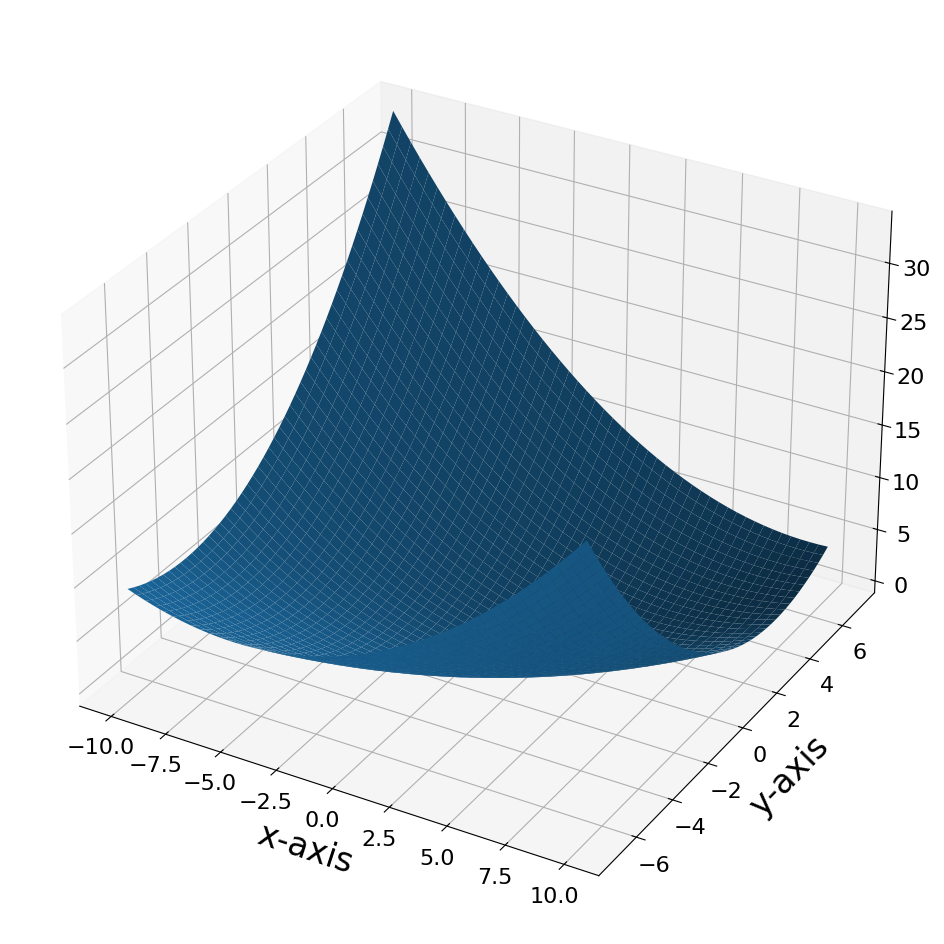

In [8]:
# we set up a quadratic function f(x) = 0.5 x^T A x - b x + c
# as we will see below the contours of this function, are ellipses
# Given the maximum and minimum radius of an ellipse, and the vector that determines
# in which direction the maximum radius occurs (major axis) the function `elliptic_matrix`
# returns the matrix A for which the contour f(x)=1 corresponds to the specified ellipse
v_maj = [2,1]
R_maj, R_min = 5, 2
A = elliptic_matrix(v_maj, R_maj, R_min)

# the minimum of f is in the centre of the ellipses, and as we know
# this minimum location is also the solution of Ax = b
# here, we choose the centre ourselves - and choose b such that
# it is indeed a solution
xs = [3,1]
b = A @ xs

# contruct the quadratic - the constant c=0, but is not relevant
f = quadratic_function(A, b)

# first let's do a 3d surface plot
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1, projection='3d')
x = np.linspace(-10, 10, 50)
y = np.linspace(-7, 7, 50)
# create a Nx x Ny x 2 (Nx=Ny=50) array of grid points
xy = np.array(np.meshgrid(x, y)).T
ax.plot_surface(xy[:,:,0], xy[:,:,1], f(xy))
ax.set_xlabel('x-axis', size=24, labelpad=10)
ax.set_ylabel('y-axis', size=24, labelpad=10)

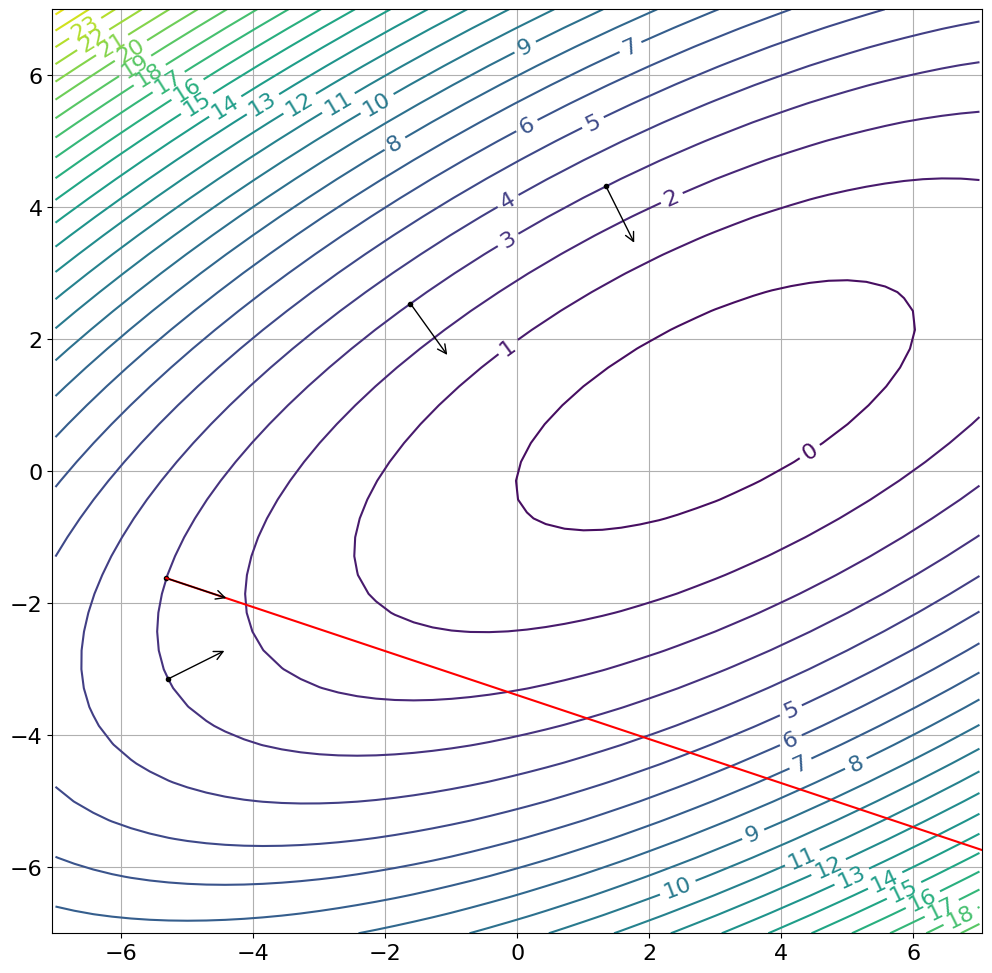

In [9]:
# then a 2d contour plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.grid()
x = np.linspace(-7, 7, 50)
y = np.linspace(-7, 7, 50)
# create a Nx x Ny x 2 (Nx=Ny=50) array of grid points
xy = np.array(np.meshgrid(x, y)).T
c = ax.contour(xy[:,:,0], xy[:,:,1], f(xy), 25)
ax.clabel(c)
# ensure an equal aspect ratio of x and y
# this is important for arrows pointing in the right direction:
axis = ax.axis('equal')

# we'll plot a number of points one a specific contour with value cval
# (we take the value from one of the contours)
cval = c.cvalues[4]

sample_x = sample_points_on_contour(ax, cval, A, b)

for x in sample_x:
    ax.plot(x[0], x[1], 'k.')
    dx = b - A @ x  # negative gradient
    # draw a (normalized) vector in that direction:
    ax.annotate("", xy=x+dx/np.linalg.norm(dx), xytext=x,
                arrowprops={'arrowstyle': '->'})

# use the last sample point to draw a steepest descent line
# we plot it outside the current axis first
ax.plot([x[0], x[0]+1000*dx[0]], [x[1], x[1]+1000*dx[1]], 'r')
# and then restore the old axis
ax.axis(axis);

In the figure above, the black arrows indicate the negative gradient of $f$, which is used as the search direction for the steepest descent algorithm. At the points on each contour that are either the furthest away or the closest to the centre, the negative gradient points exactly in the direction of the centre. The centre here is the
desired solution ${\bf x}^*$. Thus for those points, if we travel in the steepest descent direction we can immediately hit the solution in a single step. For other points the gradient is not directly bringing us in the correct direction, so we expect to need multiple steps to reach the minimum.

For one of those points we've drawn a red line indicating the search direction
of steepest descent. The values of $f$ along that line, given by $\hat
f(\alpha)$, are displayed in the following figure.

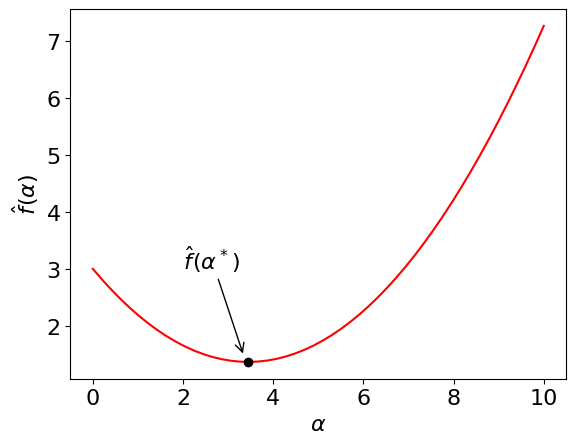

In [10]:
x = sample_x[-1]
figure5(x, A, b)

The values of $\hat f(\alpha)$, corresponding to values of $f$ along the red
line in the previous contour plot. As expected, when we compute $\alpha^*$
according to [(alpha_optimal)](#alpha_optimal) we arrive at the minimum of $f$ along that
line. The point on the line that this corresponds to is taken as the updated
position $x^{(k)}$ in the next step of the steepest descent algorithm.

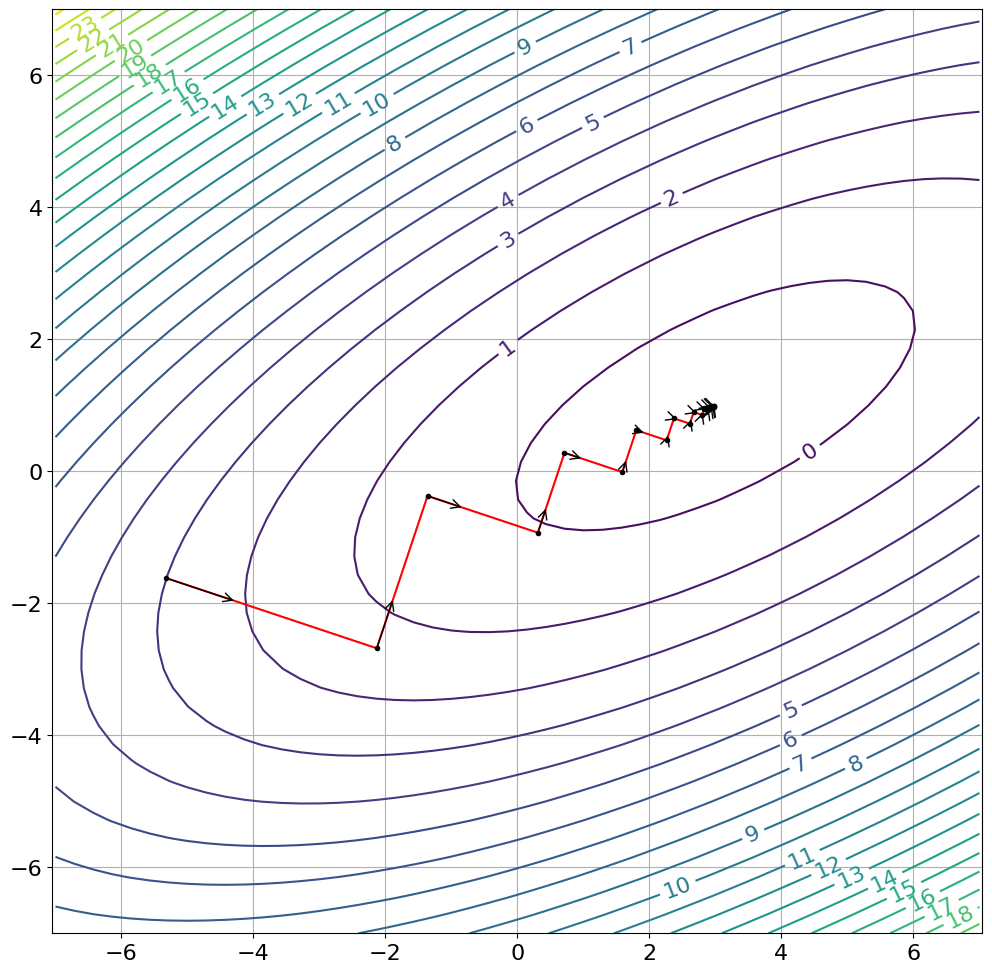

In [11]:
def steepest_descent(A, b, x):
    r = b - A @ x
    alpha_star = np.dot(r, r)/np.dot(r, A @ r)
    return x + alpha_star*r

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.grid()
x = np.linspace(-7, 7, 50)
y = np.linspace(-7, 7, 50)
# create a Nx x Ny x 2 (Nx=Ny=50) array of grid points
xy = np.array(np.meshgrid(x, y)).T
c = ax.contour(xy[:,:,0], xy[:,:,1], f(xy), 25)
ax.clabel(c)
# ensure an equal aspect ratio of x and y
# this is important for angles and arrows pointing in the right direction:
axis = ax.axis('equal')

def arrow(x, dx):
    ax.plot(x[0], x[1], 'k.')
    ax.annotate("", xy=x+dx, xytext=x,
           arrowprops={'arrowstyle': '->'})
    
# same starting point
x0 = sample_x[-1]

for i in range(20):
    x1 = steepest_descent(A, b, x0)

    ax.plot([x0[0], x1[0]], [x0[1], x1[1]], 'r')

    # residual, which is also the gradient of f
    r = A @ x0 - b
    # rescale relative to length of the current step
    r = r/sl.norm(r)*sl.norm(x1-x0)/3.
    arrow(x0, -r)
    
    x0 = x1

The figure above shows the trajectory of the steepest algorith for a number of
steps. As you may notice the direction of each subsequent step is orthogonal to
the previous one (why?). In two dimensions this means that it only moves in two
alternating directions. In more dimensions this is not the case, each new
direction is still orthogonal to the previous one, but the relationship with the
directions in even earlier steps is less obvious. Nonetheless, we can
intuitively see that the steepest descent algorithm takes a somewhat indirect
route and may require quite a few iterations to converge to the desired solution
$x^*$.

# Improving the Steepest or Gradient Descent Method
In this lecture we have looked at the steepest descent method applied to a very specific, but important, problem: the minimisation of convex quadratic functions, or equivalently, the solution of Symmetric Positive Definitive linear systems. In tomorrow's lecture, and the day after, we will look at the Conjugate Gradient method which is more powerful for these kinds of problems. As we will see in later lectures, for more general non-linear problems that can locally be approximated as quadratic, we will discuss other "more sophisticated" iterative methods (Newton's method and quasi-Newton methods). A recurring theme for these methods though, is that where these methods struggle, e.g. in the presence of saddle points, they will fall back to the same approach of steepest descent, which is to simply move in the direction of the negative gradient.

That is not to say that the steepest descent method, or gradient descent as it's more frequently referred to in machine learning, is not a very important and frequently used method in a lot of practical applications. In particular in machine learning applications the minimisation of the cost function can be very challenging: not only do we have to deal with the "narrow valley" problem we've encountered above, which can be related back to the problem of ill-conditioning, the typical high-dimensional, very non-convex cost functions encountered in machine learning also suffer from the presence of very many saddle points, which as we mentioned these "more sophisticated" methods struggle to deal with.

There are a number of improvements over the very basic version of gradient descent we have introduced above, which we will discuss here briefly. This is a field of research that is still very much developing. For those interested, for a relatively recent overview of gradient descent methods in machine learning see https://www.ruder.io/optimizing-gradient-descent/.

## Stochastic and Mini-Batch approaches
A recurring theme in this module is that we are working with models for which the forward evaluation, but in particular the gradient, is expensive. This is in particular the case for large machine learning models that require large training data sets which may be so large that they don't even fit in memory. These do however fall into a class of problems in which the cost function can be broken down into a sum of contributions:
$$
  f({\bf x}) = \sum_i^m f_i({\bf x}).
$$

For instance in a least squares regression of a model $Y\approx F(X; {\bf x})$ where we $m$ data points $X_i, Y_i$ (samples) and we want to invert (optimise for) $n$ parameters stored in a vector ${\bf x}$, then each data point gives a separate contribution to the cost function
$$
  f({\bf x}) = \sum_i^m (F(X_i; {\bf x}) - Y_i)^2.
$$

In that case we can also break up the calculation of the gradient
$$
  \nabla_{\bf x} f({\bf x}) = \sum_i^m \nabla_{\bf x} f_i({\bf x}) =\sum_i^m 2 (F(X_i; {\bf x}) - Y_i)\nabla_{\bf x} F(X_i; {\bf x})
$$

If we follow the approach of traditional gradient descent, we would first have to compute all individual $\nabla f_i({\bf x})$ and then sum them up before we can even make a single step. In a lot of regression models however the information contained in the individual gradient contributions is similar, so we might try applying each individual gradient as a step

\begin{eqnarray*}
  \text{for } i \text{ in } [1,n]: &\\
   {\bf x} \to &{\bf x} - \alpha \nabla f_i({\bf x})
\end{eqnarray*}

Note that now each sample gives a new iteration of ${\bf x}$, and we are updating the dependency of $f$ on ${\bf x}$ immediately. Running through all samples, referred to as an epoch, we may then repeat this process a few times. Although the individual $\nabla f_i({\bf x})$ may be similar in some sense there will be a lot of variability, and thus the progress in each individual step will be much worse than in a full iteration of the original gradient descent, but of course each individual step is now much, much cheaper - and in an averaged sense over multiple iterations we actually get a better gradient as we immediately update ${\bf x}$. We should therefore think of $\nabla f_i({\bf x})$ as a very noisy, stochastic variable, which averaged over sufficient samples gives us a good direction vector. To avoid biases in different parts of the training data as we loop through them, the order is typically randomized. This approach is called <a class="definition" href="#definitions" id="stochasticgradientdescent">stochastic gradient descent</a>.

As a compromise between the original gradient descent, which runs through the entire training data in each iteration, and stochastic gradient descent, which only uses a single sample for each iteration, the <a class="definition" href="#definitions" id="minibatch">mini-batch</a> approach first computes the gradients $\nabla f_i({\bf x})$ for a small subset of the samples (the mini batch) before changing $\bf x$. This leads to a smoother convergence, as it averages the noisy signal of $\nabla f_i({\bf x})$, but moreover can easily be parallelised (vectorised) as the different $\nabla f_i({\bf x})$ in each mini-batch can be computed independently as we don't immediately update $\bf x$ within the mini-batch. This can lead to a significant computational speed up.

## Learning Rate Schemes
In this lecture we made the assumption that the function we are minimising is quadratic, for which as we have seen it is relatively straightforward to exactly compute the minimum along the descent direction. For more general nonlinear functions however this becomes more problematic. At the very least we should be able to compute the gradient of the function (or an approximation thereof) in our starting point, otherwise we can not do gradient descent, but that doesn't really tell us how the function will behave further away from the starting point: it should initially be descreasing in the descent direction but we have no idea how far to go before it starts increasing again. In the case of a quadratic function, we can exactly minimise the 1D quadratic function restricted to the line of the descent direction. For more general non-linear functions we will see how we can approximate it locally as a quadratic, but that requires access to the second-derivative which can be very expensive to compute.

The simplest solution, is to choose a fixed small value of $\alpha$, in the context of machine learning this often called the <a class="definition" href="#definitions" id="learningrate">learning rate</a>, to decide how far we go in the descent direction in one iteration. In practice it can be very hard to choose what a suitably small value of $\alpha$ is. If we choose it too small we might make very little progress, which means we will have to evaluate our function many times which is expensive. If we choose it too large we might be constantly overshooting our target. Too avoid the latter, generally speaking we want to decrease the learning rate as we hone in on the solution. Various schemes have been developed to achieve this in machine learning. Some of the simpler learning rate schemes simply set the learning as a decaying function of the iteration number. The downside of these is that there are typically a number of hyperparameters that need to be chosen and adapted for each specific problem. As discussed in the next section, more recent adaptive learning rate methods, combine ideas of momentum, with automatically adapted learning rates in different directions.

In this module we will focus more on line search methods which try out a few different values of $\alpha$ along each chosen direction until we find a point in which the function has sufficiently decreased from its value in our starting point (see lecture 5 for more details).

Finally, another popular scheme for choosing $\alpha$ for the gradient descent method applied to more "well-behaved" functions, is the <a class="definition" href="#definitions" id="BarzilaiBorweinmethod">Barzilai-Borwein method</a> which uses an approximation of the curvature of the function in the direction that was taken in the previous step, going from iterationx $\bf x^{(k)}$ to $\bf x^{(k-1)}$, using the formula

$$
\alpha^{(k)} = \frac{\left({\bf x^{(k)}}-{\bf x^{(k-1)}}\right)^T \left({\nabla f({\bf x^{(k)}})}-\nabla f({\bf x^{(k-1)}})\right)}{\left\|{\nabla f({\bf x^{(k)}})}-\nabla f({\bf x^{(k-1)}})\right\|^2}
$$

This choice is closely related to the secant method we will discuss in section 5.

## Momentum Methods
In momentum methods the current negative gradient direction calculated in the current positions is combined (averaged) with those from previous iterations. The idea behind this is that it improves the highly oscillatory behaviour of the gradient in stochastic gradient descent, and, to some extent, also in the case of narrow valleys like the narrow ellipse example we saw above. The gradient will have some component in the more useful direction (say along the valley) in all of the iterations, but in other directions in which the method is oscillating the gradient will have opposite signs in subsequent iterations, and thus average out to zero. In methods like Adagrad, RMSProp, and ADAM these ideas are combined with the idea of choosing different learning rates in different directions. If we divide the training data in mini-batches, then simply averaging the gradient vector over a number of subsequent iterations may bias the momentum (the averaged direction) in the direction of parameters associated with features that occur frequently in the data, which leads to learning rates that are too low for infrequent features. This is avoided by selecting a different rate for different directions.

# List of Definitions
<a id="definitions"/>

* <a class=definition href="#optimisationproblem">optimisation problem</a>
* <a class=definition href="#rootfindingproblem">root-finding problem</a>
* <a class=definition href="#roots">roots</a>
* <a class=definition href="#stationarypoints">stationary points</a>
* <a class=definition href="#localminimaormaxima">local minima or maxima</a>
* <a class=definition href="#localextrema">local extrema</a>
* <a class=definition href="#globalminimumormaximum">global minimum (or maximum)</a>
* <a class=definition href="#saddlepoint">saddle point</a>
* <a class=definition href="#Hessian">Hessian</a>
* <a class=definition href="#SymmetricPositiveDefiniteSPD">Symmetric Positive Definite (SPD)</a>
* <a class=definition href="#PositiveSemiDefinite">Positive Semi-Definite</a>
* <a class=definition href="#localminimum">local minimum</a>
* <a class=definition href="#localminimizer">local minimizer</a>
* <a class=definition href="#strictlocalminimumstrictlocalminimizer">strict local minimum (strict local minimizer)</a>
* <a class=definition href="#steepestdescent">steepest descent</a>
* <a class=definition href="#stochasticgradientdescent">stochastic gradient descent</a>
* <a class=definition href="#minibatch">mini-batch</a>
* <a class=definition href="#learningrate">learning rate</a>
* <a class=definition href="#BarzilaiBorweinmethod">Barzilai-Borwein method</a>
